## Data exploration

In [2]:
import numpy as np
import dogs_vs_cats as dvc
import matplotlib.pyplot as plt
%matplotlib inline

all_files = dvc.image_files()

Using Theano backend.


data file train.zip has already been downloaded
Data has already been extracted


In [3]:
n_images_train=5000
n_images_val=500
n_images_test=500
input_image_shape = (3,50,50) 
_, _,train_and_val_files, \
test_features, test_labels, test_files = dvc.training_test_datasets(all_files,
                                                                    n_images_train+n_images_val,n_images_test,
                                                                    input_image_shape)

train_features,train_labels, train_files,\
val_features,val_labels,val_files =  dvc.training_test_datasets(train_and_val_files,
                                                               n_images_train,n_images_val,
                                                               input_image_shape)




Loading train set
loading image (1/5500)
loading image (101/5500)
loading image (201/5500)
loading image (301/5500)
loading image (401/5500)
loading image (501/5500)
loading image (601/5500)
loading image (701/5500)
loading image (801/5500)
loading image (901/5500)
loading image (1001/5500)
loading image (1101/5500)
loading image (1201/5500)
loading image (1301/5500)
loading image (1401/5500)
loading image (1501/5500)
loading image (1601/5500)
loading image (1701/5500)
loading image (1801/5500)
loading image (1901/5500)
loading image (2001/5500)
loading image (2101/5500)
loading image (2201/5500)
loading image (2301/5500)
loading image (2401/5500)
loading image (2501/5500)
loading image (2601/5500)
loading image (2701/5500)
loading image (2801/5500)
loading image (2901/5500)
loading image (3001/5500)
loading image (3101/5500)
loading image (3201/5500)
loading image (3301/5500)
loading image (3401/5500)
loading image (3501/5500)
loading image (3601/5500)
loading image (3701/5500)
loadin

In [4]:
train_features.shape, train_labels.shape,train_files[:10],train_labels[:10]

((5000, 3, 50, 50),
 (5000,),
 array(['train/dog.6327.jpg', 'train/dog.1651.jpg', 'train/cat.6073.jpg',
        'train/dog.4197.jpg', 'train/cat.1629.jpg', 'train/cat.11496.jpg',
        'train/cat.9392.jpg', 'train/dog.4497.jpg', 'train/dog.4357.jpg',
        'train/cat.6476.jpg'], 
       dtype='<U19'),
 array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=uint8))

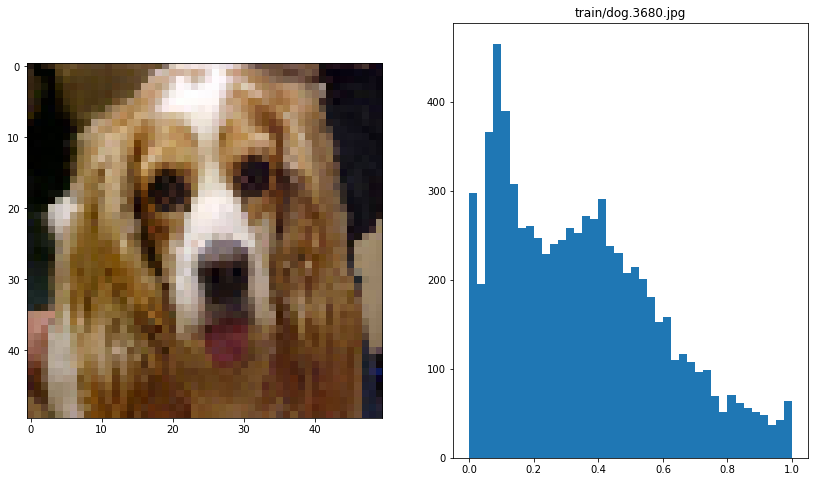

In [5]:

index_example = 32
fig,ax = plt.subplots(1,2,figsize=(14,8))
ax[0].imshow(train_features[index_example,].transpose((1,2,0)))
ax[1].set_title(train_files[index_example])
_ = ax[1].hist(train_features[index_example,].ravel(),bins=40)


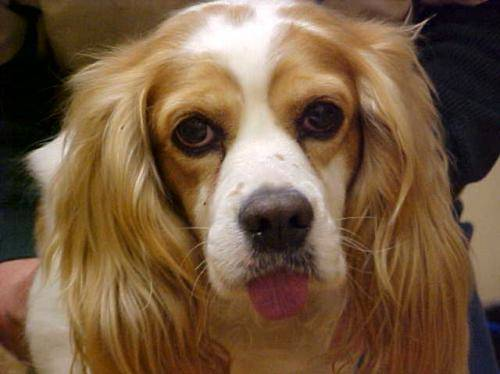

In [6]:
from IPython.display import Image,display

display(Image(train_files[index_example]))

## Preprocessing

In [ ]:
        # Zero-center by mean pixel
        #media = np.array([103.939, 116.779, 123.68])
        #media = media[:,np.newaxis,np.newaxis]

In [7]:
media = np.mean(train_features,axis=(0,2,3),keepdims=True)
print(media.shape,media.ravel())

#media = media[:,np.newaxis,np.newaxis]
train_features-=media
val_features-=media
test_features-=media

(1, 3, 1, 1) [ 0.49014908  0.45637459  0.41830775]


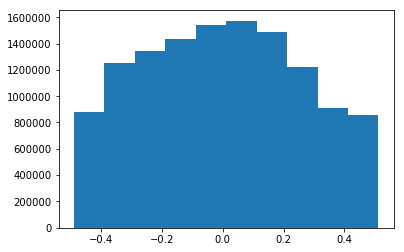

In [17]:
_ = plt.hist(train_features[:,0,:,:].ravel())

## FC network

`keras` notation:
* *epoch*:  Each epoch is a full loop over **all** the training data.
* `nb_epoch`: Number of epochs to train the model. 
* `batch_size`: Number of samples to use in each *stochastic* gradient update.

For example, 80 epochs consist on 80 loops over all the training examples. If there are 1000 examples and batch size is set to 32 there will be 1000/32 * 80 gradient updates. Each gradient is estimated using 32 samples.

In [18]:
input_shape_flat = np.prod(input_image_shape)
train_features_flat = train_features.reshape((train_features.shape[0],input_shape_flat))
val_features_flat = val_features.reshape((val_features.shape[0],input_shape_flat))
print(train_features_flat.shape,val_features_flat.shape)

(5000, 7500) (500, 7500)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation

fc_model = Sequential([
    Dense(1024, input_dim=input_shape_flat),
    Activation('sigmoid'),
    Dense(512),
    Activation('sigmoid'),
    Dense(256),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid')
])

fc_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nb_epoch=20
hist=fc_model.fit(train_features_flat,
                  train_labels, 
                  nb_epoch=nb_epoch,validation_data=(val_features_flat,
                                               val_labels),
                  batch_size=32,verbose=2)

Train on 5000 samples, validate on 500 samples
Epoch 1/20
8s - loss: 0.6937 - acc: 0.5468 - val_loss: 0.6745 - val_acc: 0.5860
Epoch 2/20
8s - loss: 0.6598 - acc: 0.6048 - val_loss: 0.6673 - val_acc: 0.5880
Epoch 3/20
8s - loss: 0.6225 - acc: 0.6470 - val_loss: 0.6859 - val_acc: 0.5800
Epoch 4/20
8s - loss: 0.5729 - acc: 0.6978 - val_loss: 0.7068 - val_acc: 0.5920
Epoch 5/20
8s - loss: 0.5222 - acc: 0.7328 - val_loss: 0.7185 - val_acc: 0.6260
Epoch 6/20
8s - loss: 0.4429 - acc: 0.7946 - val_loss: 0.8067 - val_acc: 0.5880
Epoch 7/20
8s - loss: 0.3499 - acc: 0.8478 - val_loss: 0.8860 - val_acc: 0.6040
Epoch 8/20
8s - loss: 0.2788 - acc: 0.8792 - val_loss: 0.9104 - val_acc: 0.6180
Epoch 9/20
8s - loss: 0.2131 - acc: 0.9118 - val_loss: 0.9777 - val_acc: 0.6400
Epoch 10/20
9s - loss: 0.1843 - acc: 0.9258 - val_loss: 1.1062 - val_acc: 0.5880
Epoch 11/20
9s - loss: 0.1442 - acc: 0.9444 - val_loss: 1.0342 - val_acc: 0.6480
Epoch 12/20
8s - loss: 0.1206 - acc: 0.9508 - val_loss: 1.3003 - val_ac

In [20]:
fc_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 1024)          7681024     dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 1024)          0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           524800      activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 512)           0           dense_2[0][0]                    
___________________________________________________________________________________________

In [26]:
hist.history

{'acc': [0.54679999999999995,
  0.6048,
  0.64700000000000002,
  0.69779999999999998,
  0.73280000000000001,
  0.79459999999999997,
  0.8478,
  0.87919999999999998,
  0.91180000000000005,
  0.92579999999999996,
  0.94440000000000002,
  0.95079999999999998,
  0.95399999999999996,
  0.96240000000000003,
  0.97299999999999998,
  0.97540000000000004,
  0.96679999999999999,
  0.97060000000000002,
  0.9738,
  0.98180000000000001],
 'loss': [0.69366034822463984,
  0.65975029859542844,
  0.62249886417388911,
  0.57285456590652462,
  0.52216947336196895,
  0.44287444887161254,
  0.34986991629600522,
  0.27879441351890566,
  0.21305932412147521,
  0.18427479792833329,
  0.14417193372249604,
  0.12060253009796143,
  0.11872209381386638,
  0.093043477576971054,
  0.073463427489995958,
  0.068748708534240727,
  0.093020530149340627,
  0.075714781323075298,
  0.07507919370532036,
  0.050853656646609305],
 'val_acc': [0.58600000095367433,
  0.58799999904632572,
  0.5800000004768372,
  0.5919999990463

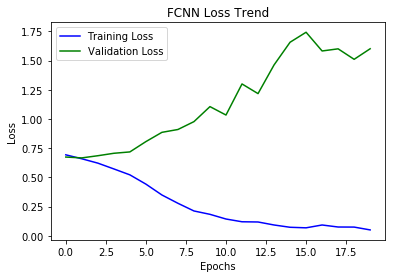

In [22]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('FCNN Loss Trend')
plt.plot(hist.history["loss"], 'blue', label='Training Loss')
plt.plot(hist.history["val_loss"], 'green', label='Validation Loss')
#plt.xticks(range(0,nb_epoch,2))
plt.legend()

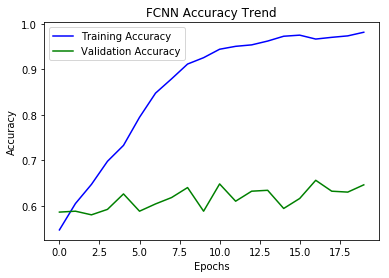

In [23]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('FCNN Accuracy Trend')
plt.plot(hist.history["acc"], 'blue', label='Training Accuracy')
plt.plot(hist.history["val_acc"], 'green', label='Validation Accuracy')
plt.legend()

## CNN

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

def catdog(input_image_shape):
    model = Sequential()
    model.add(Convolution2D(32, 3, 3,input_shape=input_image_shape))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(64, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(Convolution2D(128, 3, 3))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    model.add(Activation('sigmoid'))
    optimizer = Adam()
    objective = 'binary_crossentropy'
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

cnn_model = catdog(input_image_shape)
cnn_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 48, 48)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 32, 48, 48)    128         convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 48, 48)    0           batchnormalization_1[0][0]       
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 46, 46)    9248        activation_1[0][0]               
___________________________________________________________________________________________

In [9]:
nb_epoch=80
print("Model compiled, start training")
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, 
                                        verbose=1, mode='auto')
history = cnn_model.fit(train_features, train_labels,validation_data=(val_features,val_labels),
                        batch_size=32, nb_epoch=nb_epoch,verbose=2,callbacks=[early_stopping_callback])

Model compiled, start training
Train on 5000 samples, validate on 500 samples
Epoch 1/80
62s - loss: 0.7438 - acc: 0.5636 - val_loss: 0.7354 - val_acc: 0.4620
Epoch 2/80
62s - loss: 0.6488 - acc: 0.6218 - val_loss: 0.8203 - val_acc: 0.4600
Epoch 3/80
61s - loss: 0.6182 - acc: 0.6614 - val_loss: 0.6743 - val_acc: 0.5760
Epoch 4/80
61s - loss: 0.5751 - acc: 0.7060 - val_loss: 0.6781 - val_acc: 0.6520
Epoch 5/80
62s - loss: 0.5418 - acc: 0.7288 - val_loss: 0.5752 - val_acc: 0.7000
Epoch 6/80
61s - loss: 0.5053 - acc: 0.7556 - val_loss: 0.8093 - val_acc: 0.6400
Epoch 7/80
59s - loss: 0.4810 - acc: 0.7768 - val_loss: 0.7709 - val_acc: 0.6840
Epoch 8/80
60s - loss: 0.4393 - acc: 0.7992 - val_loss: 0.8211 - val_acc: 0.6340
Epoch 9/80
61s - loss: 0.4069 - acc: 0.8134 - val_loss: 0.4712 - val_acc: 0.7940
Epoch 10/80
61s - loss: 0.3890 - acc: 0.8294 - val_loss: 0.4872 - val_acc: 0.7920
Epoch 11/80
62s - loss: 0.3439 - acc: 0.8474 - val_loss: 0.4882 - val_acc: 0.8040
Epoch 12/80
62s - loss: 0.323

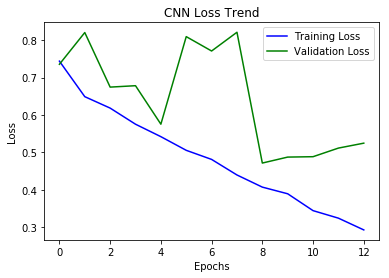

In [10]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss Trend')
plt.plot(history.history["loss"], 'blue', label='Training Loss')
plt.plot(history.history["val_loss"], 'green', label='Validation Loss')
#plt.xticks(range(0,nb_epoch,2))
plt.legend()

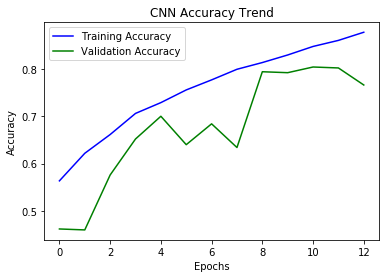

In [11]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Trend')
plt.plot(history.history["acc"], 'blue', label='Training Accuracy')
plt.plot(history.history["val_acc"], 'green', label='Validation Accuracy')
plt.legend()

In [12]:
# evaluate the model
results = cnn_model.evaluate(test_features,test_labels)
print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(cnn_model.metrics_names,results)]))

500/500 [==============================] - 2s     
loss: 0.5028 acc: 0.7660


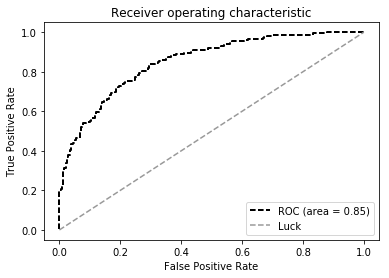

In [13]:
preds = cnn_model.predict(test_features)
dvc.plotROC(test_labels,preds)

Things to explore:
* Use more data.
* Data augmentation. [ImageDataGenerator](https://keras.io/preprocessing/image/)
* Icrease regularization
* Save best model (instead of geting the latest) [ModelCheckPoint](https://keras.io/callbacks/)
* Test differences running in gpu vs cpu.

## Save model
Remember to save the computed mean.

In [14]:
model_name = "cnn_trained_model.h5"
cnn_model.save("cnn_trained_model.h5")

In [15]:
import h5py
model_name = "cnn_trained_model.h5"
with h5py.File(model_name,"r+") as f:
    f.create_dataset("media_modelo",data=media)